<a href="https://colab.research.google.com/github/singhmegh/DL-project-Face-mask-detection-by-CNN/blob/main/DL_face_mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [3]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dataset

In [6]:
#API fetch
!kaggle datasets download -d omkargurav/face-mask-dataset


Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# extract the compressed dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing** **Dependencies**


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_954.jpg', 'with_mask_1815.jpg', 'with_mask_3658.jpg', 'with_mask_331.jpg', 'with_mask_2152.jpg']
['with_mask_3563.jpg', 'with_mask_2788.jpg', 'with_mask_1634.jpg', 'with_mask_2508.jpg', 'with_mask_3714.jpg']


In [11]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1686.jpg', 'without_mask_421.jpg', 'without_mask_1697.jpg', 'without_mask_607.jpg', 'without_mask_2751.jpg']
['without_mask_1967.jpg', 'without_mask_1265.jpg', 'without_mask_742.jpg', 'without_mask_2380.jpg', 'without_mask_1708.jpg']


In [12]:
print("Number of with mask images", len(with_mask_files))
print("Number of without mask images", len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


**Creating the labels for the two class of images**

with mask --> 1

without mask --> 0

In [13]:
# create the labels

with_mask_labels = [1]*3725     #Take the list [1] and repeat it n times.

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying** **the** **images**

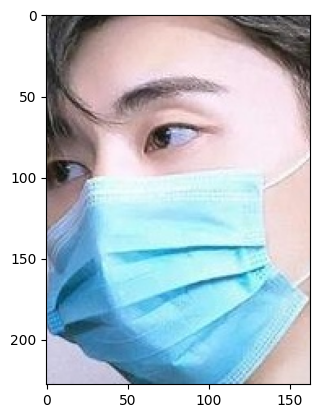

In [20]:
# Displaying with mask image

img = mpimg.imread("/content/data/with_mask/with_mask_1545.jpg")
imgplot = plt.imshow(img)
plt.show()

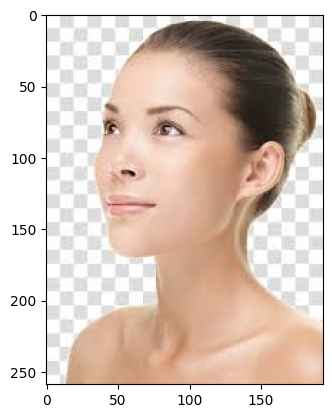

In [22]:
# Displaying without mask image

img = mpimg.imread("/content/data/without_mask/without_mask_2925.jpg")
imgplot = plt.imshow(img)
plt.show()

**Image** **Processing**

1.Resize the images

2.Convert the images to numpy arrays

In [34]:
#Convert images to numpy arrays

with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)



without_mask_path = "/content/data/without_mask/"


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [35]:
type(data)

list

In [36]:
len(data)

7553

array([[[236, 236, 236],
        [234, 234, 232],
        [239, 238, 235],
        ...,
        [239, 238, 236],
        [239, 238, 234],
        [239, 238, 234]],

       [[237, 236, 235],
        [238, 237, 235],
        [238, 237, 232],
        ...,
        [240, 239, 237],
        [238, 237, 232],
        [240, 239, 235]],

       [[238, 237, 235],
        [235, 234, 232],
        [235, 234, 231],
        ...,
        [237, 236, 234],
        [240, 239, 236],
        [239, 238, 234]],

       ...,

       [[208, 207, 216],
        [246, 245, 253],
        [242, 242, 247],
        ...,
        [249, 243, 247],
        [248, 242, 244],
        [247, 241, 244]],

       [[133, 133, 145],
        [225, 225, 235],
        [236, 236, 243],
        ...,
        [251, 244, 248],
        [250, 244, 246],
        [245, 239, 241]],

       [[ 66,  65,  79],
        [141, 141, 153],
        [243, 243, 254],
        ...,
        [249, 243, 245],
        [247, 241, 243],
        [248, 242, 244]]], dtype=uint8)
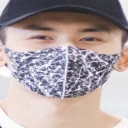

In [37]:
data[0]

In [38]:
type(data[0])

numpy.ndarray

In [39]:
data[0].shape                      #height,breadth,color channel

(128, 128, 3)

In [40]:
# converting the image list and label list to numpy array

x = np.array(data)
y = np.array(labels)

In [41]:
type(x)

numpy.ndarray

In [42]:
type(y)

numpy.ndarray

In [43]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


**Train** **test** **split**

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [48]:
# Scaling the data
# we used Min–Max Scaling

x_train_scaled = x_train/255

x_test_scaled = x_test/255

array([[[189, 192, 200],
        [129, 129, 146],
        [ 97,  96, 118],
        ...,
        [114, 101, 162],
        [127, 113, 173],
        [138, 124, 183]],

       [[161, 164, 175],
        [106, 106, 124],
        [ 88,  86, 109],
        ...,
        [ 99,  87, 147],
        [113, 101, 159],
        [134, 120, 179]],

       [[128, 130, 143],
        [ 87,  87, 106],
        [ 81,  79, 104],
        ...,
        [ 94,  85, 144],
        [107,  95, 154],
        [121, 108, 167]],

       ...,

       [[104, 119, 130],
        [120, 143, 158],
        [122, 152, 174],
        ...,
        [ 22,  36,   5],
        [ 41,  55,  21],
        [ 60,  74,  40]],

       [[113, 134, 147],
        [110, 136, 155],
        [110, 143, 167],
        ...,
        [ 39,  53,  22],
        [ 54,  69,  35],
        [ 68,  83,  48]],

       [[107, 136, 156],
        [102, 134, 157],
        [ 99, 136, 163],
        ...,
        [ 61,  75,  42],
        [ 74,  87,  53],
        [ 79,  92,  57]]], dtype=uint8)
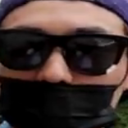

In [49]:
x_train[0]

In [50]:
x_train_scaled[0]

array([[[0.74117647, 0.75294118, 0.78431373],
        [0.50588235, 0.50588235, 0.57254902],
        [0.38039216, 0.37647059, 0.4627451 ],
        ...,
        [0.44705882, 0.39607843, 0.63529412],
        [0.49803922, 0.44313725, 0.67843137],
        [0.54117647, 0.48627451, 0.71764706]],

       [[0.63137255, 0.64313725, 0.68627451],
        [0.41568627, 0.41568627, 0.48627451],
        [0.34509804, 0.3372549 , 0.42745098],
        ...,
        [0.38823529, 0.34117647, 0.57647059],
        [0.44313725, 0.39607843, 0.62352941],
        [0.5254902 , 0.47058824, 0.70196078]],

       [[0.50196078, 0.50980392, 0.56078431],
        [0.34117647, 0.34117647, 0.41568627],
        [0.31764706, 0.30980392, 0.40784314],
        ...,
        [0.36862745, 0.33333333, 0.56470588],
        [0.41960784, 0.37254902, 0.60392157],
        [0.4745098 , 0.42352941, 0.65490196]],

       ...,

       [[0.40784314, 0.46666667, 0.50980392],
        [0.47058824, 0.56078431, 0.61960784],
        [0.47843137, 0

**Building** **a** **CNN**

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))          #no more fitting issues

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# complile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [54]:
#Traing the neural network
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - acc: 0.7243 - loss: 0.6309 - val_acc: 0.8777 - val_loss: 0.2777
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8788 - loss: 0.3017 - val_acc: 0.9025 - val_loss: 0.2295
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8896 - loss: 0.2570 - val_acc: 0.9074 - val_loss: 0.2346
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9225 - loss: 0.2088 - val_acc: 0.9256 - val_loss: 0.1906
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9309 - loss: 0.1713 - val_acc: 0.9306 - val_loss: 0.1835


**Model** **evaluation**

In [55]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("Test Accuracy = ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9208 - loss: 0.2238
Test Accuracy =  0.9225678443908691


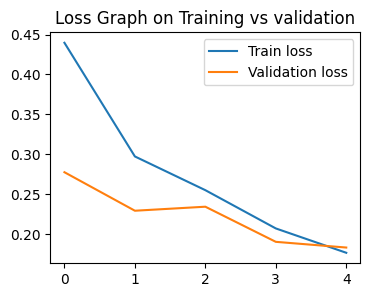

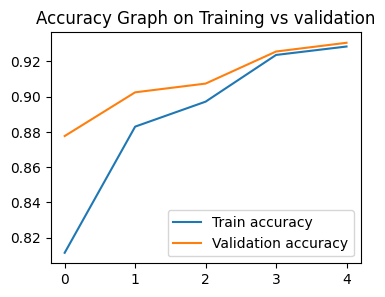

In [65]:
h = history

#plot the loss value
plt.figure(figsize=(4,3))
plt.plot(h.history['loss'],label = "Train loss")
plt.plot(h.history['val_loss'],label = "Validation loss")
plt.legend()
plt.title("Loss Graph on Training vs validation")
plt.show()

#plot the accuracy value
plt.figure(figsize=(4,3))
plt.plot(h.history['acc'],label = "Train accuracy")
plt.plot(h.history['val_acc'],label = "Validation accuracy")
plt.legend()
plt.title("Accuracy Graph on Training vs validation")
plt.show()

**Predictive** **System**

Path of the image to be predicted/content/testt2.jpeg


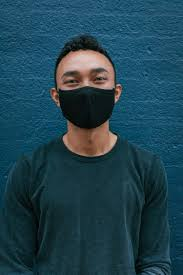

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.10748737 0.74369115]]
1
The person in the image is wearing mask


In [73]:
input_image_path = input("Path of the image to be predicted")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("The person in the image is wearing mask")

else:

  print("The person in the image is not wearing mask")